In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
insert_ascending_amp = pandas.read_csv(
    'results_csv/results_main/' +
    'BenchmarkLsm_InsertAscendingKeysOrderWithSizeAmplificationCheck.csv')
insert_random_amp = pandas.read_csv(
    'results_csv/results_main/' +
    'BenchmarkLsm_InsertRandomKeysOrderWithSizeAmplificationCheck.csv')
insert_ascending_noamp = pandas.read_csv(
    'results_csv/results_main/' +
    'BenchmarkLsm_InsertAscendingKeysOrderWithoutSizeAmplificationCheck.csv')
insert_random_noamp = pandas.read_csv(
    'results_csv/results_main/' +
    'BenchmarkLsm_InsertRandomKeysOrderWithoutSizeAmplificationCheck.csv')

search_amp = pandas.read_csv(
    'results_csv/results_main/' +
    'BenchmarkLsm_SearchWithSizeAmplificationCheck.csv')
search_noamp = pandas.read_csv(
    'results_csv/results_main/' +
    'BenchmarkLsm_SearchWithoutSizeAmplificationCheck.csv')

In [3]:
insert_ascending = pandas.read_csv(
    'results_csv/results_basic/' +
    'BenchmarkLsm_InsertAscendingKeysOrder.csv')
insert_random = pandas.read_csv(
    'results_csv/results_basic/' +
    'BenchmarkLsm_InsertRandomKeysOrder.csv')

search = pandas.read_csv(
    'results_csv/results_basic/' +
    'BenchmarkLsm_Search.csv')

## Insertion

Let's compare insertions with old and new compaction strategies:\
___random key order:___

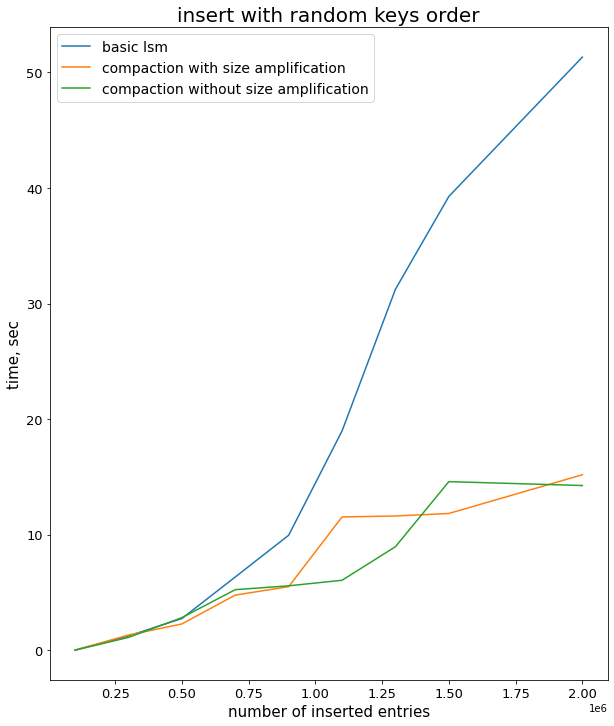

In [4]:
plt.figure(figsize=(10, 12))
plt.plot(insert_random["count"], insert_random["time"] * 1e-9, label="basic lsm")
plt.plot(insert_random_amp["count"], insert_random_amp["time"] * 1e-9, label="compaction with size amplification")
plt.plot(insert_random_noamp["count"], insert_random_noamp["time"] * 1e-9, label="compaction without size amplification")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('number of inserted entries', fontsize=15)
plt.ylabel('time, sec', fontsize=15)
plt.title("insert with random keys order", fontsize=20)
plt.legend(fontsize=14, loc='best')
plt.show()

___ascending key order:___

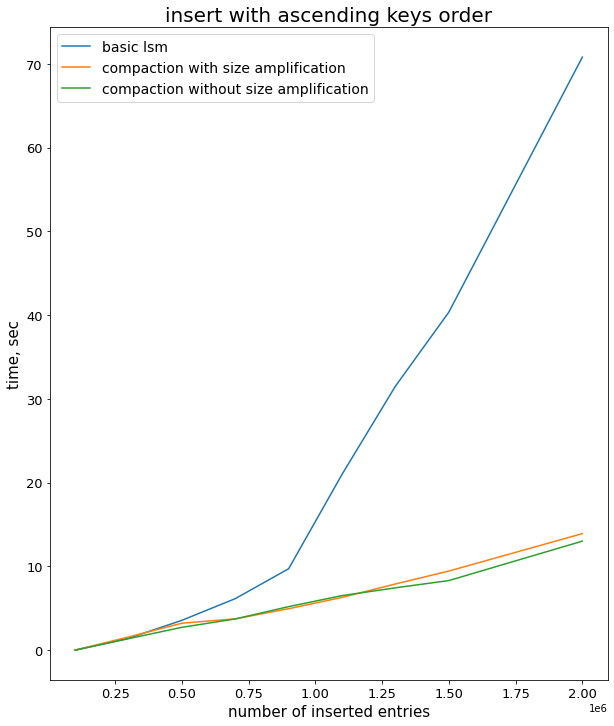

In [5]:
plt.figure(figsize=(10, 12))
plt.plot(insert_ascending["count"], insert_ascending["time"] * 1e-9, label="basic lsm")
plt.plot(insert_ascending_amp["count"], 
         insert_ascending_amp["time"] * 1e-9, label="compaction with size amplification")
plt.plot(insert_ascending_noamp["count"], 
         insert_ascending_noamp["time"] * 1e-9, label="compaction without size amplification")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('number of inserted entries', fontsize=15)
plt.ylabel('time, sec', fontsize=15)
plt.title("insert with ascending keys order", fontsize=20)
plt.legend(fontsize=14, loc='best')
plt.show()

We see that speed of insertion was greatly improved.

## Search

Now let's compare search speed (number of searched entries is fixed, lsm size varies):

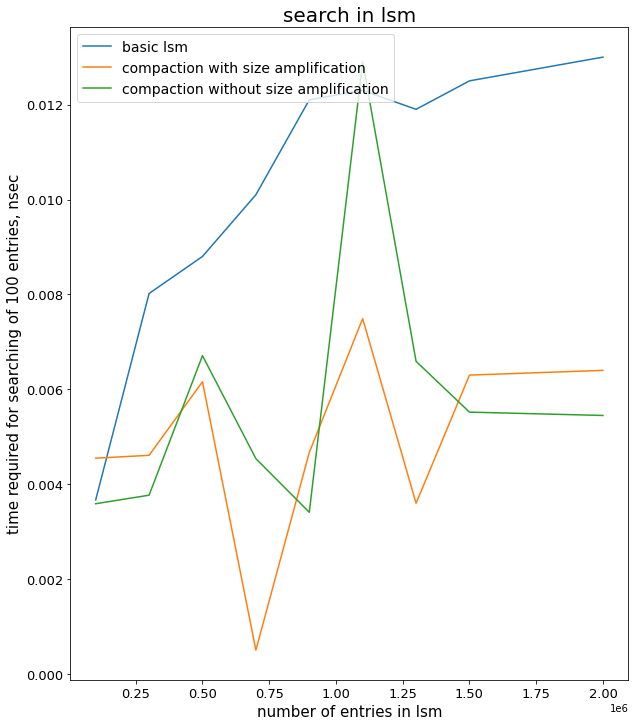

In [6]:
plt.figure(figsize=(10, 12))
plt.plot(search["count"], search["time"], label="basic lsm")
plt.plot(search_amp["count"], 
         search_amp["time"], label="compaction with size amplification")
plt.plot(search_noamp["count"], 
         search_noamp["time"], label="compaction without size amplification")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('number of entries in lsm', fontsize=15)
plt.ylabel('time required for searching of 100 entries, nsec', fontsize=15)
plt.title("search in lsm", fontsize=20)
plt.legend(fontsize=14, loc=2)
plt.show()

 We see that search in lsm which uses compaction is faster than in basic version of lsm.